<div style="text-align: center"><H1> PROBLEMA DE DIRICHLET </H1></div>
<div style="text-align: center"><H4> Flores Carmona Jorge Emilio | Ecs.Dif. Parciales I | EJERCICIO 2 </H4></div>


Intrucciones: Resuelva los ejercicios de la manera más detallada, completa y clara posible.
Entregue este ejercicio.

1. Para resolver la ecuación de Laplace:

$$\frac{∂^2u}{∂x^2}+\frac{∂^2u}{∂y^2}=0,    0<x<1,    0<y<1$$
Para las condiciones de frontera:

b) $u(0, y) = 10y;u_x(1,y)= −1; u(x, 0) = u(x, 1) = 0$

Graficamos las condiciones de frontera

In [4]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import math

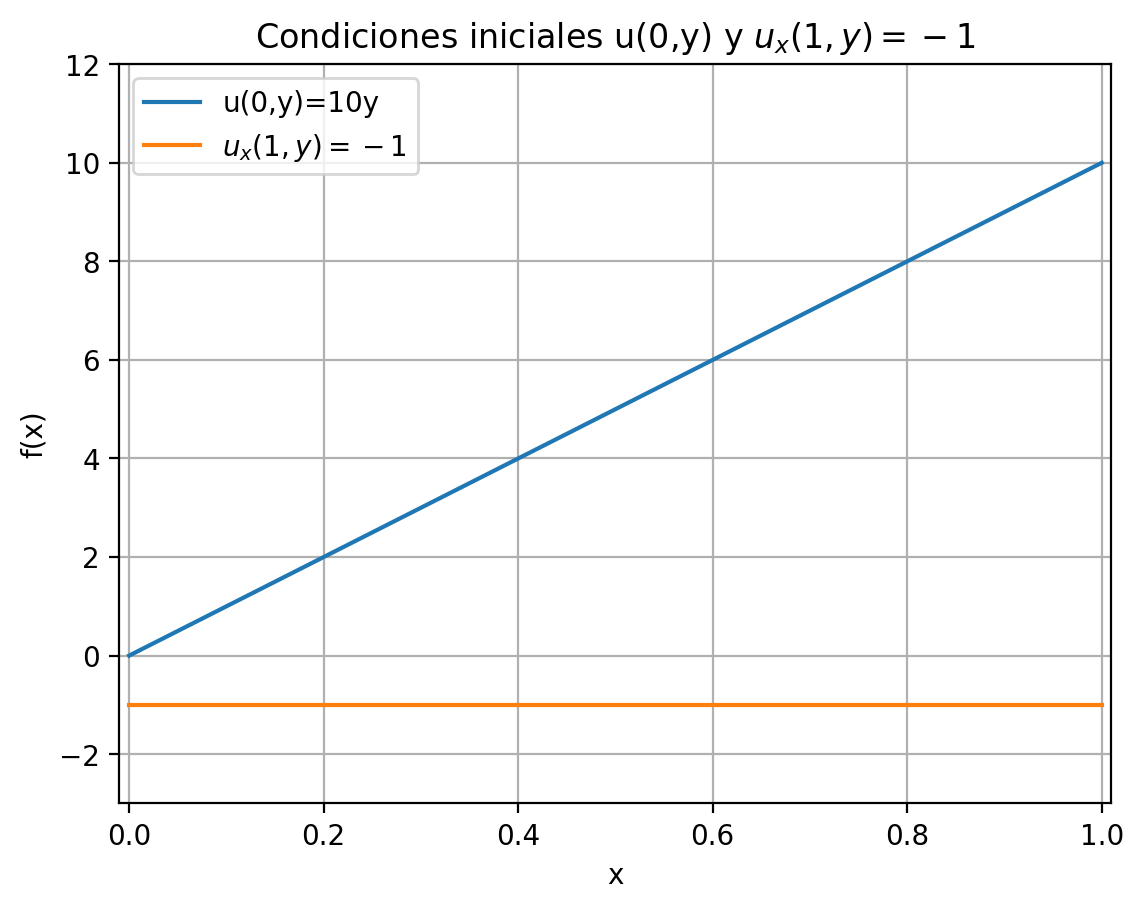

In [6]:
from matplotlib import animation,rc 
from IPython.display import HTML 
%config InlineBackend.figure_format = 'retina'
def pendiente(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 0) and (x[i] <= 1):
          y[i] = (10*x)[i]
    return y
def recta_1(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 0) and (x[i] <= 1):
          y[i] = -1
    return y
x = linspace(0,1,1000)
f = pendiente(x)
f_1 = recta_1(x)
plot(x,f,label='u(0,y)=10y')
plot(x,f_1,label='$u_x(1,y)=-1$')
plt.xlabel('x'); plt.ylabel('f(x)'); 
plt.title("Condiciones iniciales u(0,y) y $u_x(1,y)=-1$")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()


Usamos series de Fourier para aproximar la primer y segunda condicion de frontera
$u(0,y)=10y$ y $u_x(1,y)=-1$ 

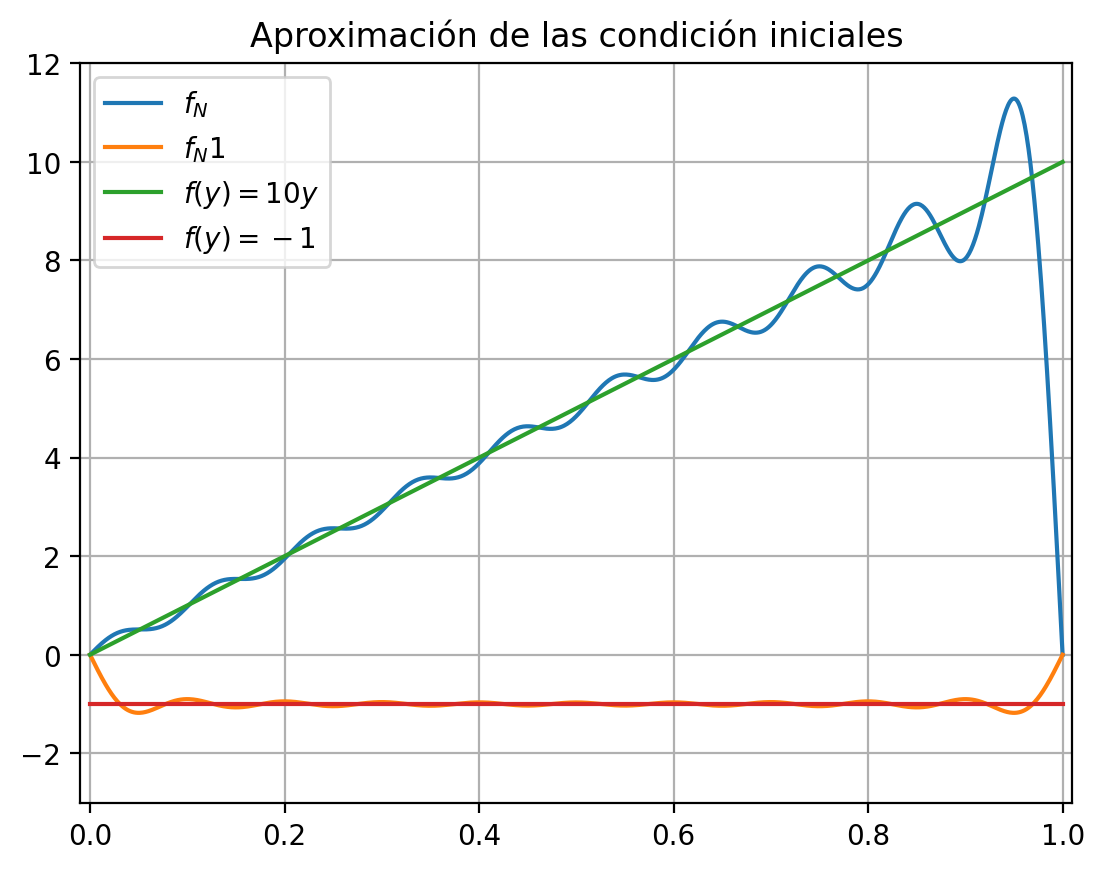

In [9]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 20.0*(0-cos(n*pi))*sin(n*pi*x)/(n*pi)
    return (f)
def u_1(x,N=20): # N es el número de armónicos
    f_1 = zeros(len(x))
    for n in range(1,N):
        f_1 += 2.0*(cos(n*pi)-1)*sin(n*pi*x)/(n*pi)
    return (f_1)
f_n = u_0(x)
f_n1 = u_1(x)
plot(x,f_n,label='$f_N$')
plot(x,f_n1,label='$f_N1$')
plot(x,f,label='$f(y)=10y$')
plot(x,f_1,label='$f(y)=-1$')
plt.xlabel(''); plt.ylabel(''); 
plt.title("Aproximación de las condición iniciales")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()

Graficamos la solucion completa con 20 armonicos y $y=0$ $$u(x,y)=\sum_{n=1}^{\infty}(A_n cosh(n\pi x)+B_n sinh(n\pi x))sin (n\pi y)$$

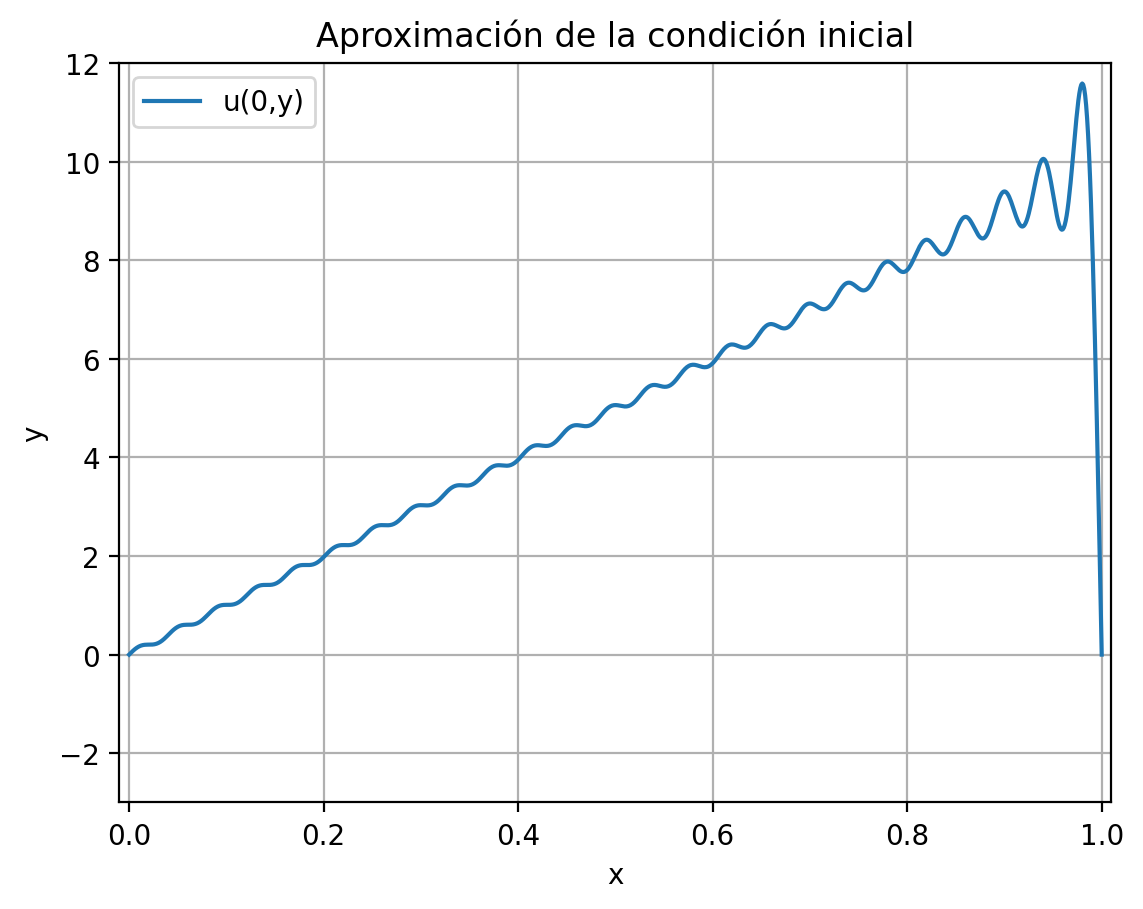

In [10]:
def u_x_y(x,y,N=50):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            a_n = 20.0*(0-cos(n*pi))/(n*pi)
            b_n = (2.0*(cos(n*pi)-1)+20*n*pi*cos(n*pi))/((n**2)*(pi**2)*cosh(n*pi))
            f[:,i] += (a_n*cosh(n*pi*y[i]) + b_n*sinh(n*pi*y[i]))*sin(n*pi*x)
    return (f)
x = linspace(0,1,1000)
y = linspace(0,10,1000)
U = u_x_y(x,y)
plot(x,U[:,0],label='u(0,y)')
plt.xlabel('x'); plt.ylabel('y'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()
        

Ahora variamos $y$ para observar como varia la solucion respecto al cambio en un intervalo $[0,1]$


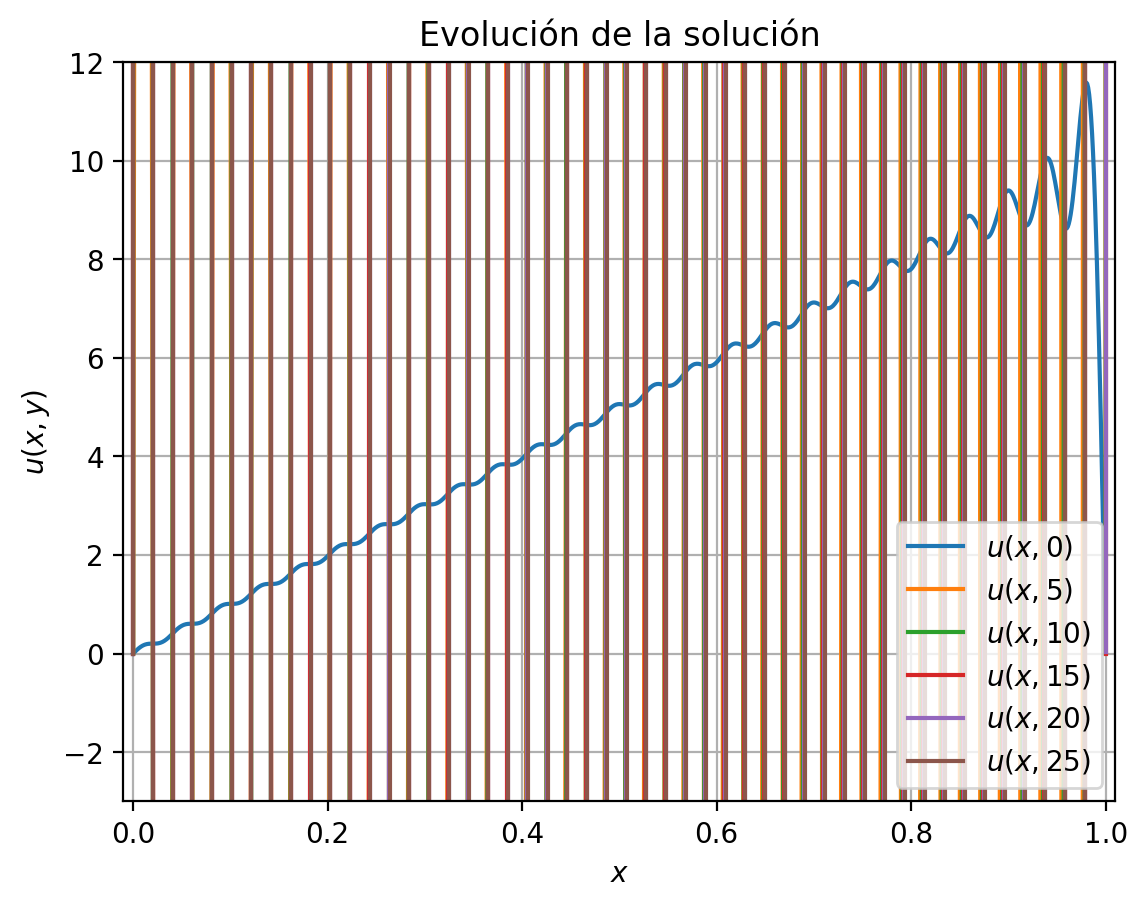

In [12]:
plot(x,U[:,0],label='$u(x,0)$')
plot(x,U[:,5],label='$u(x,5)$')
plot(x,U[:,10],label='$u(x,10)$')
plot(x,U[:,15],label='$u(x,15)$')
plot(x,U[:,20],label='$u(x,20)$')
plot(x,U[:,25],label='$u(x,25)$')
plt.xlabel('$x$')
plt.ylabel('$u(x,y)$')
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()

Veamos la solucion en una grafica 3D

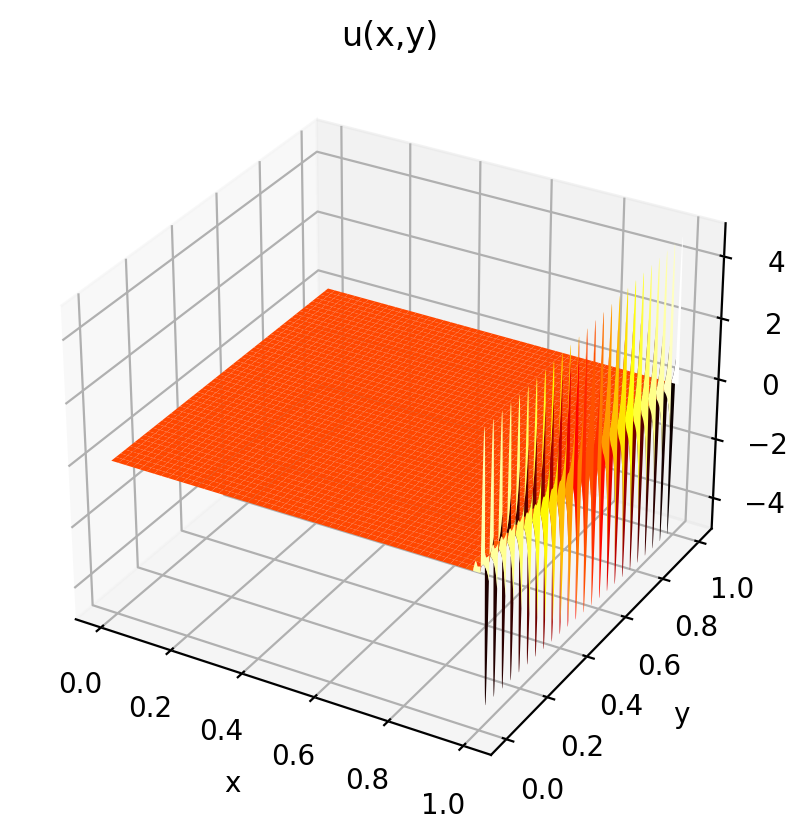

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
n=30

x = linspace(0,1.0,1000)
y = linspace(0,1.0,1000)

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('x'); plt.ylabel('y'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="hot");